## Symbolic solution to ODEs
Newton's cooling law

In [27]:
import sympy
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt

In [12]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")
# We can define the ODE very naturally by simply creating a SymPy expression for left-hand side
# of the ODE when writtrn on the form dT(t)/dt + k(T(t) - Ta) = 0

ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0)

Eq(k*(-T_a + T(t)) + Derivative(T(t), t), 0)

In [13]:
ode_sol = sympy.dsolve(ode)
ode_sol
# ode_sol is an instance of sympy.Eq, it has lhs and rhs attribute

Eq(T(t), C1*exp(-k*t) + T_a)

- Once the general solution has been found, we need to use initial conditions to find the values of  
integrations constants

In [15]:
ics = {T(0): T0}
C_eq = sympy.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

Eq(T_0, C1 + T_a)

In [17]:
C_sol = sympy.solve(C_eq)
ode_sol.subs(C_sol[0])

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

- The following function `apply_ics` is a basic implementation that generalizes these steps  
to a differential equation of arbitrary order

In [18]:
def apply_ics(sol, ics, x, known_params):
    """ apply initial conditions (ics)
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)\
        for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [19]:
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [20]:
apply_ics(ode_sol, ics, t, [k, Ta])

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

## Numerical Integration of ODEs using SciPy
The integrate method of SciPy provides two ODE solver interfaces: `integrate.odeint` and `integrate.ode`

In [22]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

- To be able to solve this ODE with SciPy's `odeint`, we first and foremost need to define a Python function  
for f(x, y(x)) that takes Python scalars or Numpy arrays as input.  
From the Sympy expression f, we can generate such a function using sympy `lambdify` with the `numpy` argument

In [23]:
f_np = sympy.lambdify((y(x), x), f)

In [25]:
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

In [30]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax


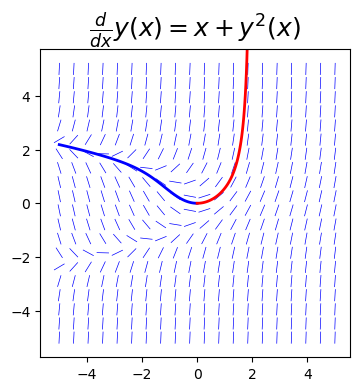

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)